In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.Pandas, Dataframes

**Описание датасета:**
- **PassengerId** - идентификационный номер пассажира;
- **Survived**	- выживание (**0** - не выжил, **1** - выжил);
- **Pclass** - 	класс билета (**1** - 1-й класс, **2** - 2-й класс, **3** - 3-й класс);
- **Name** - имя пассажира;
- **Sex** - пол;
- **Age** - возраст пассажира;	
- **SibSp** - количество близких родственников/супругов на борту Титаника;	
- **Parch**	- количество родителей/детей на борту Титаника;	
- **Ticket** - номер билета;
- **Fare** - тариф;
- **Cabin**	- номер каюты;	
- **Embarked** - порт посадки (**C** - Cherbourg, **Q** - Queenstown, **S** - Southampton).

##### 1.1.Загрузите датасет и ответьте на вопросы:
1. Сколько колонок и строк в представленном датафрейме?
1. Определить есть ли в датасете столбцы с пропущенными данными?
1. Какие типы данных содержат колонки? Сколько колонок каждого типа?

In [3]:
titanic_df = pd.read_csv('materials/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
titanic_df.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

#### 1.2.Загрузите датасет с данными об успеваемости студентов. У какой доли студентов из датасэта в колонке lunch указано free/reduced?

**Описание датасета:**
- **gender** - пол;
- **race/ethnicity** - этническая принадлежность;
- **parental level of education** - уровень образования родителей;
- **lunch** - тип питания;
- **test preparation course** - курс подготовки к экзаменам;
- **math score** - оценка по математике;
- **reading score** - оценка навыков чтения;
- **writing score** - оценка навыков письма.

In [7]:
students_performance_df = pd.read_csv('materials/StudentsPerformance.csv')\
                            .rename(columns = lambda x: x.strip().replace(' ','_'))

students_performance_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
lunch_type = students_performance_df.lunch.value_counts(normalize=True).mul(100)

print(lunch_type.head())

print(f"\n{lunch_type['free/reduced']}% of students have free/reduced type of lunch.")

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

35.5% of students have free/reduced type of lunch.


#### 1.3.Как различается среднее значение и стандартное отклонение оценок по предметам у групп студентов со стандартным ланчем или бесплатным/со скидкой?

In [9]:
# Отфильтруем колонки с оценками студентов и определим средний балл каждого студента
students_performance_df['average_score'] = students_performance_df.filter(like = 'score').apply(np.mean, axis=1).round(1)
students_performance_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3


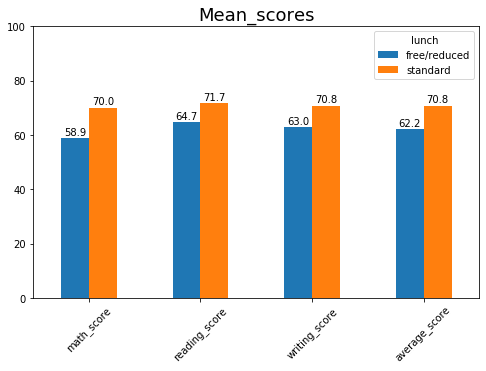

In [10]:
ax = students_performance_df.groupby(['lunch'])\
.mean()\
.transpose()\
.plot.bar(rot = 45 , figsize=(8,5), ylim=(0,100))

plt.title('Mean_scores', fontsize=18)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)), (p.get_x()+0.5*p.get_width(), p.get_height() * 1.005),
                va='bottom', ha='center')

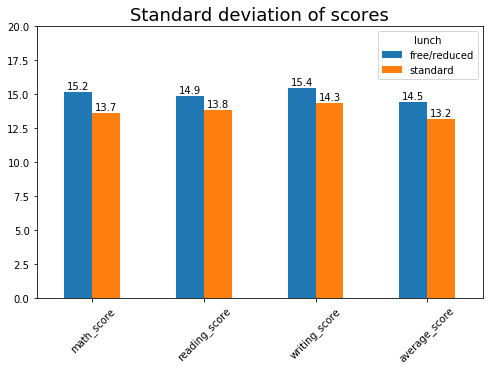

In [11]:
ax = students_performance_df.groupby(['lunch'])\
.std()\
.transpose()\
.plot.bar(rot = 45 , figsize=(8,5), ylim=(0,20))

plt.title('Standard deviation of scores', fontsize=18)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)), (p.get_x()+0.5*p.get_width(), p.get_height() * 1.005),
                va='bottom', ha='center')

##### 1.4.Отберем данные по студентам со средним быллом выше среднего значения. Визуализируем зависимость среднего балла данных студентов от их этнической принадлежности и пола.  

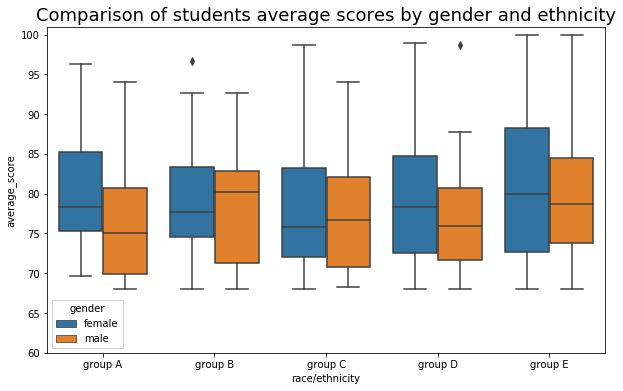

In [12]:
mean_average_score = students_performance_df.average_score.mean()

plt.figure(figsize=(10,6))
plt.title('Comparison of students average scores by gender and ethnicity', fontsize=18)
plt.ylim(60,101)

above_average_students = students_performance_df\
                   .loc[students_performance_df.average_score >= mean_average_score]
                        
students_performance_df\
.loc[students_performance_df.average_score >= mean_average_score]
sns.boxplot(x = 'race/ethnicity', 
            y = 'average_score',
            hue = 'gender',
            order = sorted(above_average_students['race/ethnicity'].unique()),
            data = above_average_students)

##### 1.5.Представьте, что у вас есть датафрэйм `df`, хранящий данные о зарплате за месяц, со всего 1-ой колонкой `income`. <br> <br> Укажите способы, как отрисовать простой зависимости зарплаты от даты.

In [13]:
df = pd.read_csv('materials/income.csv')
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


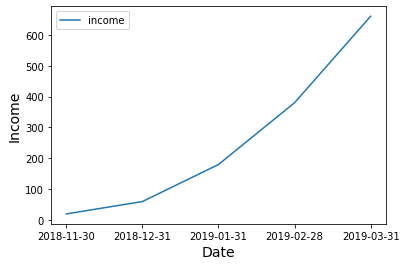

In [48]:
# Вариант 1. Matplotlib.
plt.plot(df.index, df.income)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.legend(['income'])

Text(0, 0.5, 'Income')

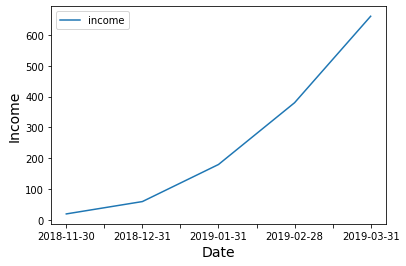

In [49]:
# Вариант 2. Pandas.
df.plot()
# df.plot(kind='line')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Income', fontsize=14)

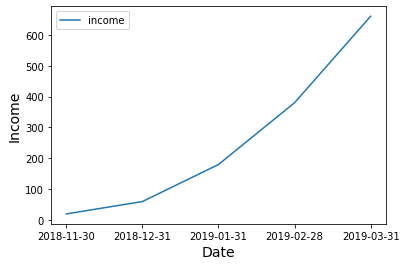

In [53]:
# Вариант 3. Seaborn.
sns.lineplot(x=df.index, y=df.income)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.legend(['income'])

Text(0, 0.5, 'Income')

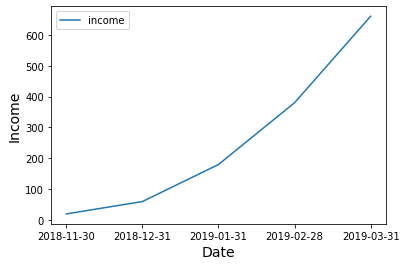

In [55]:
sns.lineplot(data=df)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Income', fontsize=14)

In [59]:
df_1 = pd.read_csv('materials/dataset_209770_6.txt', sep=' ')
df_1.head()

,x,y
0,792.871052,195.389429
1,806.145509,198.232417
2,801.528588,183.377678
3,1514.208252,596.240503
4,1002.297318,1488.332388


##### 1.6.Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных и напишите число кластеров, формируемых наблюдениями.

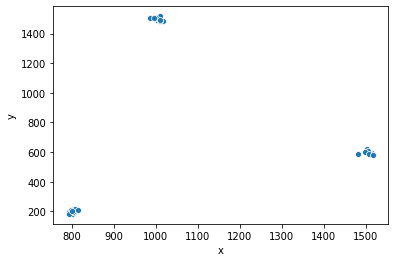

In [58]:
sns.scatterplot(x='x', y='y', data=df_1)

In [62]:
# sns.clustermap(data=df_1)

In [23]:
genome_df = pd.read_csv('materials/genome_matrix.csv')
genome_df

,Unnamed: 0,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214
2,species2,0.679708,0.887593,0.595156,0.003435,0.096052
3,species3,0.840606,0.769754,0.003435,0.458870,0.029251
4,species4,0.430842,0.203214,0.096052,0.029251,0.642109


In [24]:
genome_df = genome_df\
.rename(columns={'Unnamed: 0':'species_name'})\
.set_index(keys='species_name')

genome_df

,species0,species1,species2,species3,species4
species_name,,,,,
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


##### 1.7.Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. 

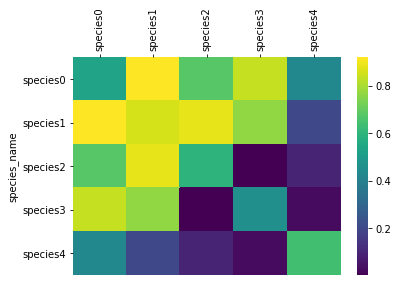

In [25]:
g = sns.heatmap(data=genome_df, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

##### 1.8.Скачайте датасэт с данными о героях из игры Dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). <br> <br> Постройте диаграмму, отражающую скольким героям сколько ролей приписывается  и напишите какое число ролей у большинства героев.

In [64]:
dota_df = pd.read_csv('materials/dota_hero_stats.csv')
dota_df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


Text(0, 0.5, 'Number of heroes')

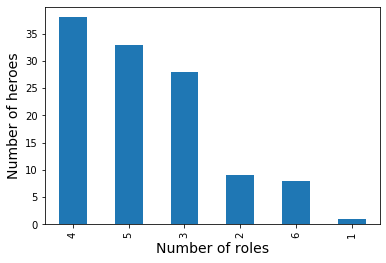

In [68]:
dota_df['roles_number'] = dota_df.roles.apply(lambda x: len(x.split(',')))
dota_df.roles_number.value_counts().plot.bar()

# #Векторизация данных pd.Series.str - вектор строковых значений
# dota_df.roles.str.split(',').str.len().value_counts().plot.bar()

plt.xlabel('Number of roles', fontsize=14)
plt.ylabel('Number of heroes', fontsize=14)

##### 1.9.Пришло время узнать какая роль в Dota 2 самая распространённая. 

In [ ]:
# import json
# # Работает
# json.loads('[123,"one","two"]')
# # Выдает ошибку
# json.loads("[123,'one','two']")

In [71]:
def string_list_to_list(string_list):
# Убираем пробелы и скобки в начале и конце строки и разбиваем её по разделителю ","    
    list_ = string_list.strip(" []").split(",")

# Убираем пробелы и кавычки в строковых элементах списка list_ 
    list_ = [element.strip("' ") for element in list_]
    return list_

In [72]:
dota_roles = dota_df.roles.apply(string_list_to_list)
dota_roles

0                                 [Carry, Escape, Nuker]
1                [Initiator, Durable, Disabler, Jungler]
2                    [Support, Disabler, Nuker, Durable]
3           [Carry, Disabler, Jungler, Nuker, Initiator]
4                    [Support, Disabler, Nuker, Jungler]
                             ...                        
112                 [Carry, Escape, Disabler, Initiator]
113                   [Support, Nuker, Disabler, Escape]
114    [Carry, Nuker, Disabler, Durable, Escape, Init...
115                   [Support, Nuker, Disabler, Escape]
116                [Carry, Initiator, Disabler, Durable]
Name: roles, Length: 117, dtype: object

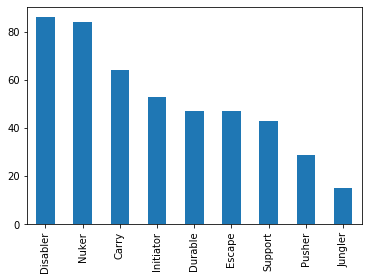

In [74]:
dota_roles.explode().value_counts().plot.bar()

##### 1.10.Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше. <br> <br> Скачайте датасэт со значениями параметров ирисов, постройте их распределения. <br> <br> Какой тип распределения наблюдается для каждого значения параметров?

In [82]:
iris_df = pd.read_csv('materials/iris.csv')
iris_df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [83]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal length  150 non-null    float64
 2   sepal width   150 non-null    float64
 3   petal length  150 non-null    float64
 4   petal width   150 non-null    float64
 5   species       150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [84]:
iris_df = iris_df.drop(['Unnamed: 0'],axis=1)
iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'Frequency')

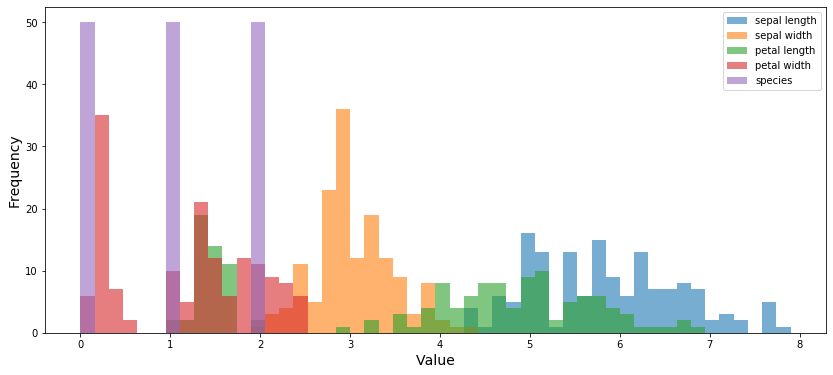

In [133]:
# Вариант 1. Совмещённые на 1 графике гистограммы. Pandas.
iris_df.plot.hist(bins=50, alpha=0.6, figsize=(14,6))

plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

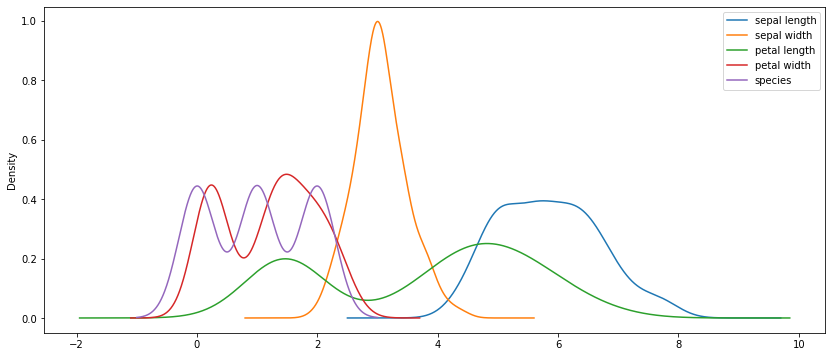

In [134]:
iris_df.plot.kde(figsize=(14,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD61E95208>,
      dtype=object)

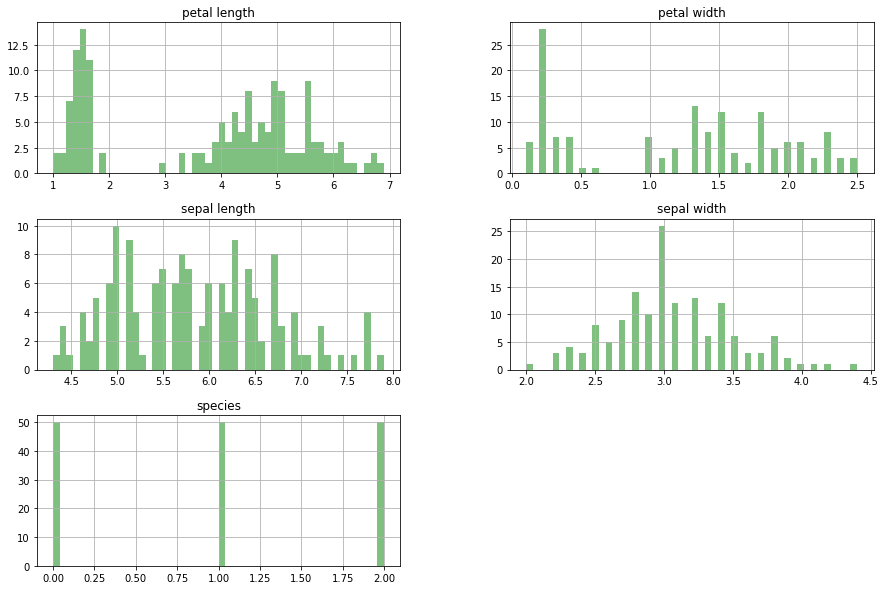

In [129]:
# Вариант 2. Каждая гистограмма на отдельном графике.
iris_df.hist(color="g", alpha=0.5, bins=50, figsize=(15,10))

- **Sepal width и sepal length имеют унимодальное распределение;**
- **Petal width и petal length имеют бимодальное распределение;**
- **Petal length имеет наибольший размах значений.**

##### 1.11.Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violinplot. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violinplot.

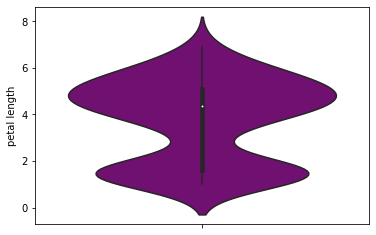

In [45]:
sns.violinplot(y='petal length', data=iris_df, color='purple')

##### 1.12.Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. <br> <br> Постройте его и посмотрите на scatter плоты для каждой из пар переменных. Какая из пар навскидку имеет наибольшую корреляцию?

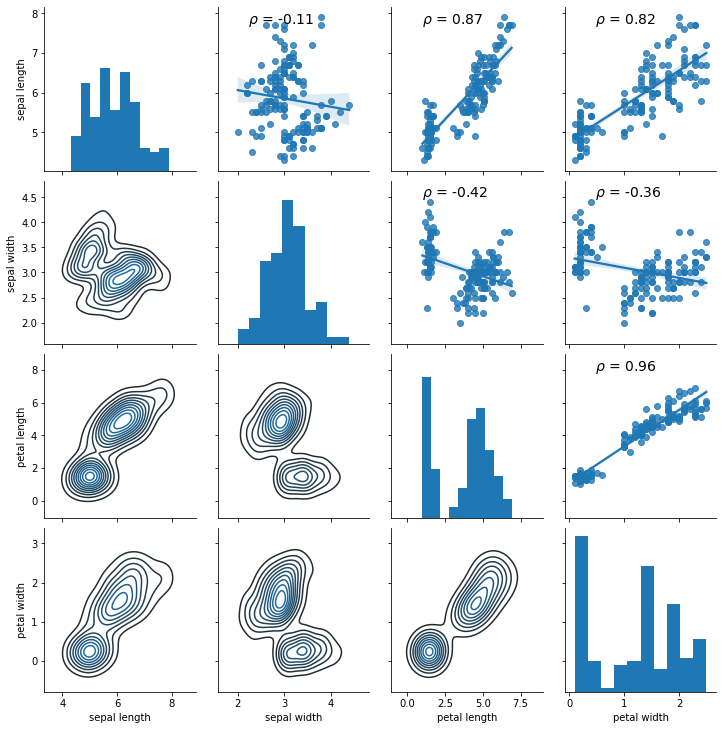

In [147]:
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.9), size = 14, xycoords = ax.transAxes)
    
g = sns.PairGrid(data=iris_df.drop(columns=['species']))
g.map_upper(sns.regplot)
g.map_upper(corr)
g.map_diag(plt.hist)
# g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot)

**Наибольшая корреляция наблюдается между параметрами 'petal_length' и 'petal width'.**

##### 1.12.Выполните группировку данных по виду ирисов и постройте для них pairplot.

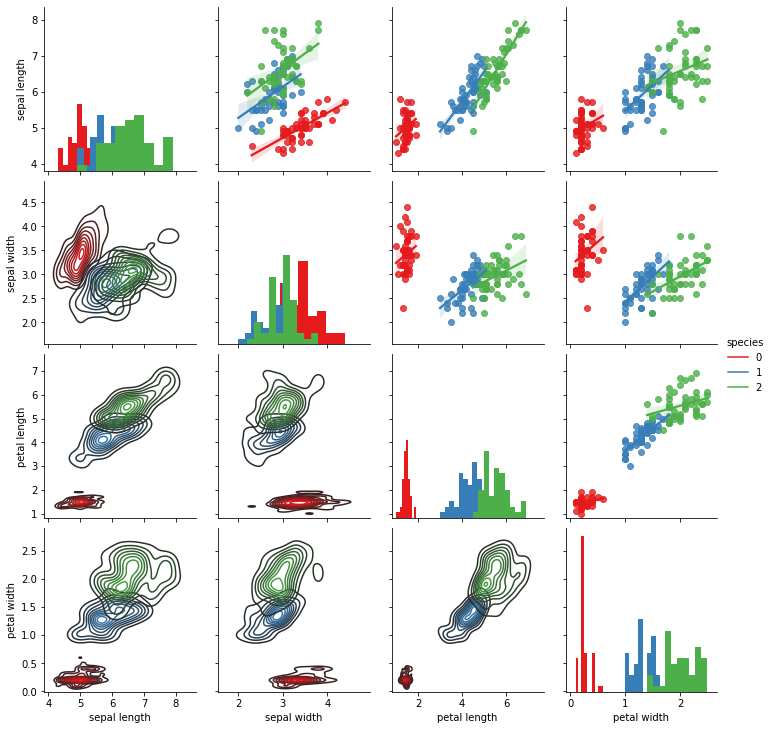

In [149]:
g = sns.PairGrid(data=iris_df, hue='species', palette='Set1')
g.map_upper(sns.regplot)
g.map_diag(plt.hist)
# g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot)
g.add_legend()